# Data Display
The following is a sample of the CSVs that will be used for this analysis.

In [17]:
import csv
import pandas as pd
import numpy as np
import os

def get_tables():
    # Define file paths
    ctg_file = 'ctgstudies_yr.csv'
    mapping_file = 'mapping.csv'
    data_file = 'code.csv'

    # Check if files exist
    if not all(os.path.exists(file) for file in [ctg_file, mapping_file, data_file]):
        raise FileNotFoundError("One or more CSV files are missing.")

    # Load CSVs into pandas DataFrames
    tables = {
        "ctgstudies": pd.read_csv(ctg_file, encoding='latin1'), #my code required latin1 encoding due to special characters in the csv file
        "mapping": pd.read_csv(mapping_file, encoding='latin1'),
        "data": pd.read_csv(data_file, encoding='latin1')

    }
    print("Tables loaded successfully:", tables.keys())
    return tables  # Return the loaded tables

def test_tables(tables):
    print("Testing tables:", tables.keys())
    # Access the tables
    ctgstudies_df = tables["ctgstudies"]
    mapping_df = tables["mapping"]
    data_df = tables["data"]

    # Print the first few rows of each table for verification
    print("CTG Studies Table:")
    print(ctgstudies_df.head())

    print("\nMapping Table:")
    print(mapping_df.head())

    print("\nData Table:")
    print(data_df.head())

# Main execution
if __name__ == "__main__":
    tables = get_tables()  # Call get_tables() to load the data
    test_tables(tables)    # Pass the tables to test_tables()

Tables loaded successfully: dict_keys(['ctgstudies', 'mapping', 'data'])
Testing tables: dict_keys(['ctgstudies', 'mapping', 'data'])
CTG Studies Table:
     NCTNumber                                         StudyTitle StudyStatus  \
0  NCT00252876  GALLEX 1 - Long Term Extension Study in Patien...  TERMINATED   
1  NCT05364476  Development and Exploration of the Effectivene...   COMPLETED   
2  NCT02863276  Modulating the Stress Response in Diabetes Mel...   COMPLETED   
3  NCT00118976  Maximal Dose of Angiotensin Converting Enzyme ...   COMPLETED   
4  NCT02229227  Safety and Efficacy of Albiglutide + Insulin G...   COMPLETED   

                                       Conditions  \
0                                 Type 2 Diabetes   
1                      Diabetes Mellitus, Type II   
2     Diabetes Mellitus Type 2|Insulin Resistance   
3  Diabetes Mellitus, Type I|Diabetic Nephropathy   
4                       Diabetes Mellitus, Type 2   

                                       In

# Diabetic Clinical Trial by Year

The following is a display of change in clinical trials by year for diabetic studies represented as a percentage from 1990 to 2020. This scatter plot attempts to answer the second research question. 'How did the concentration of diabetic studies change over the years?' 

Tables loaded successfully: dict_keys(['ctgstudies', 'mapping', 'data'])
Diabetes Percentage: 19.95%
Cancer Percentage: 1.59%
Obesity Percentage: 5.29%
Hypertension Percentage: 18.24%


C:\Users\sam2k\AppData\Local\Temp\ipykernel_6468\3138063722.py:75: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group['is_diabetes'].sum() * 100.0 / len(group))


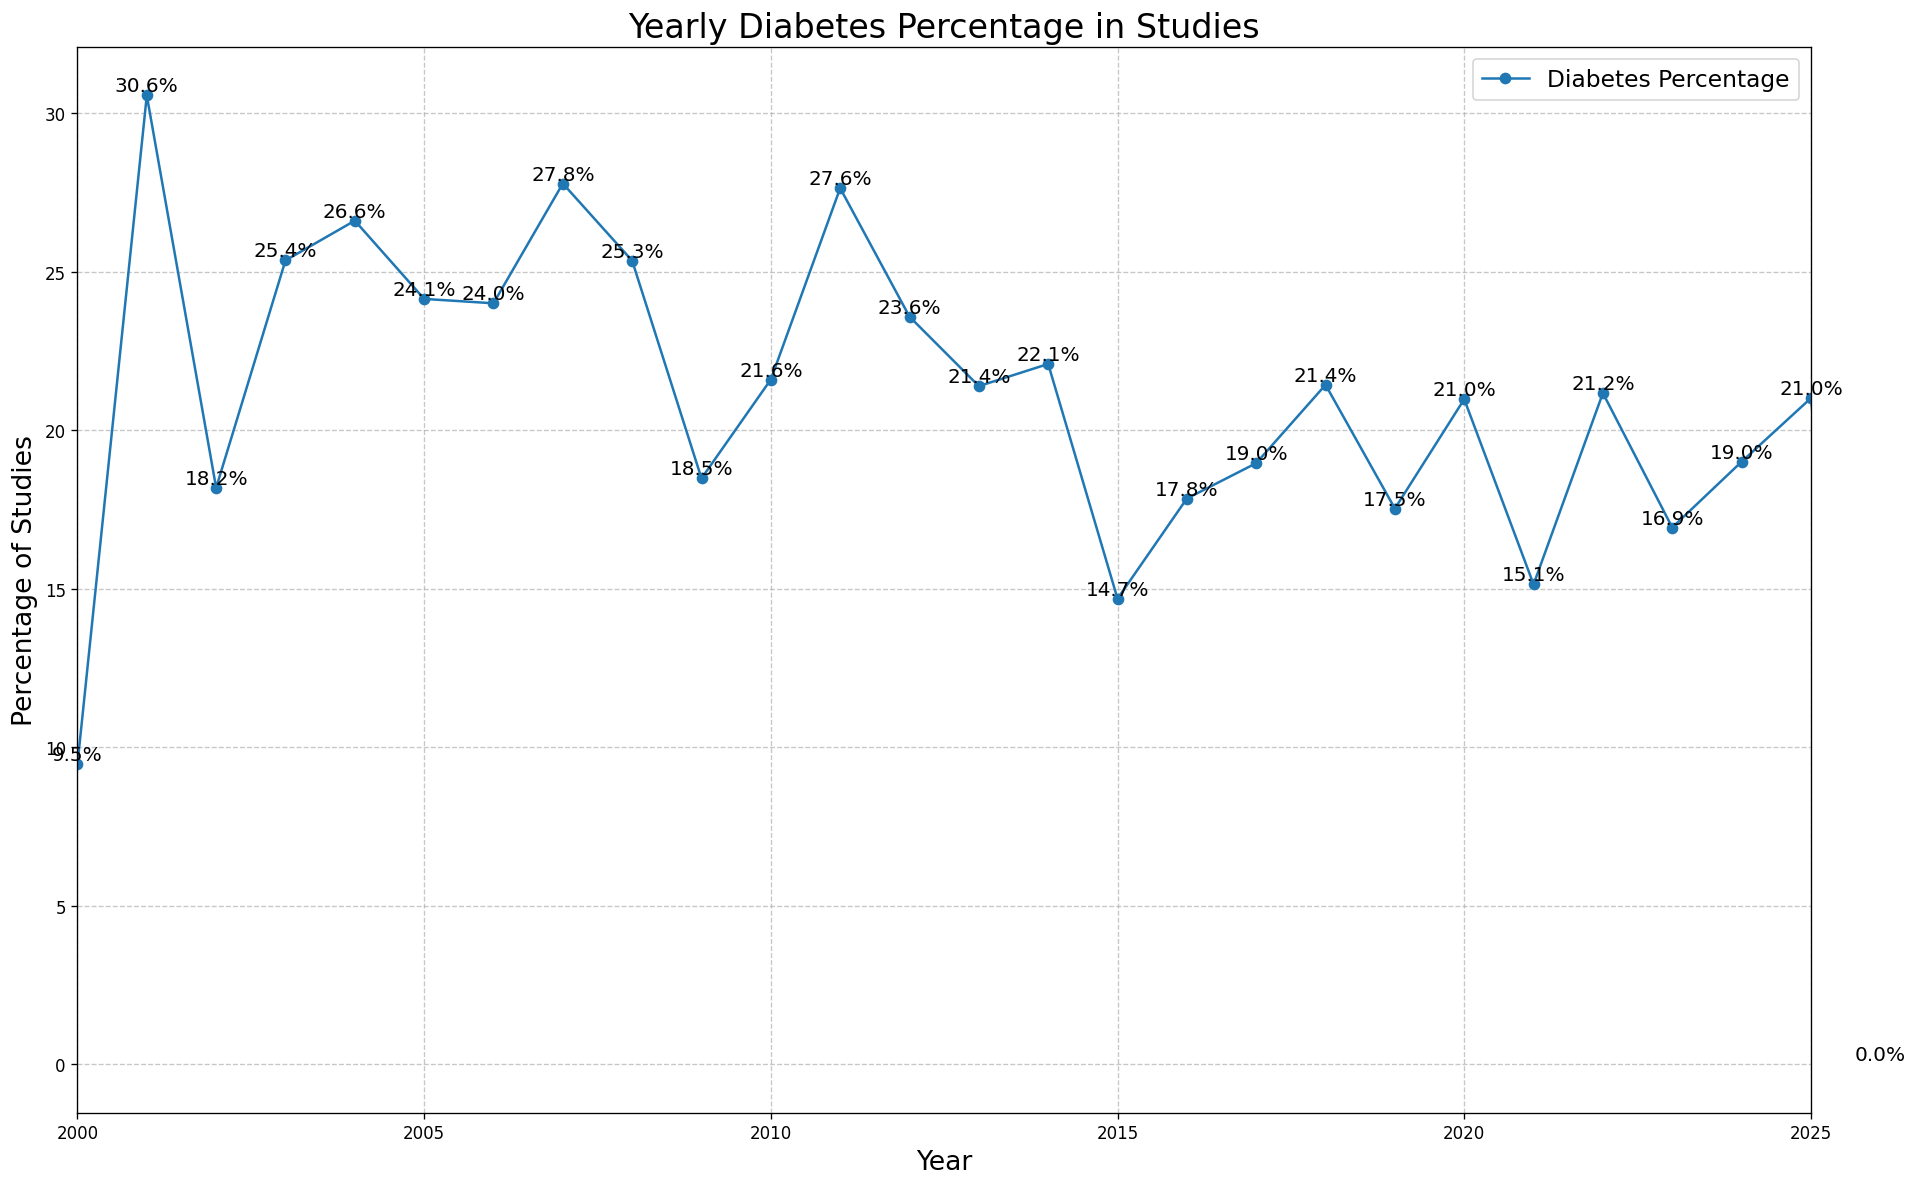

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to merge DataFrames and calculate percentages
def merge_dataframes(ctgstudies_df, mapping_df, data_df):
    # Standardize column names to lowercase
    ctgstudies_df.columns = ctgstudies_df.columns.str.lower()
    mapping_df.columns = mapping_df.columns.str.lower()
    data_df.columns = data_df.columns.str.lower()

    # Merge the DataFrames
    merged_df = ctgstudies_df.merge(mapping_df, on="nctnumber").merge(data_df, on="conditionsid")

    # Calculate percentages
    total_count = len(merged_df)
    diabetes_percentage = (merged_df['desc'].str.contains('diabetes', case=False, na=False).sum() * 100.0) / total_count
    cancer_percentage = (merged_df['desc'].str.contains('cancer', case=False, na=False).sum() * 100.0) / total_count
    obesity_percentage = (merged_df['desc'].str.contains('obesity', case=False, na=False).sum() * 100.0) / total_count
    hypertension_percentage = (merged_df['desc'].str.contains('hypertension', case=False, na=False).sum() * 100.0) / total_count

    # Print results
    print(f"Diabetes Percentage: {diabetes_percentage:.2f}%")
    print(f"Cancer Percentage: {cancer_percentage:.2f}%")
    print(f"Obesity Percentage: {obesity_percentage:.2f}%")
    print(f"Hypertension Percentage: {hypertension_percentage:.2f}%")
    
    return merged_df

def plot_yearly_trend(yearly_data, year_range=None, show_percentage=False):
    # Set a larger figure size and DPI for better visibility
    plt.figure(figsize=(16, 10), dpi=120)  # Increased DPI for sharper and larger output

    # Plot the data
    plt.plot(yearly_data['startyear'], yearly_data['yearly_diabetes_percentage'], marker='o', label='Diabetes Percentage')

    # Set labels and title with larger font sizes
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Percentage of Studies', fontsize=16)
    plt.title('Yearly Diabetes Percentage in Studies', fontsize=20)

    # Add grid and legend with adjusted font size
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=14)

    # Set x-axis range if specified
    if year_range:
        plt.xlim(year_range)

    # Annotate points with percentages if enabled
    if show_percentage:
        for x, y in zip(yearly_data['startyear'], yearly_data['yearly_diabetes_percentage']):
            plt.text(x, y, f"{y:.1f}%", fontsize=12, ha='center', va='bottom')

    # Adjust layout to prevent clipping and show the plot
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load tables
    tables = get_tables()

    # Extract DataFrames
    ctgstudies_df = tables["ctgstudies"]
    mapping_df = tables["mapping"]
    data_df = tables["data"]

    # Call the merge_dataframes function
    merged_df = merge_dataframes(ctgstudies_df, mapping_df, data_df)

    # Filter for diabetes-related studies and group by startYear
    yearly_diabetes_percentage = (
        merged_df.assign(is_diabetes=merged_df['desc'].str.contains('diabetes', case=False, na=False))
        .groupby('startyear')
        .apply(lambda group: group['is_diabetes'].sum() * 100.0 / len(group))
        .reset_index(name='yearly_diabetes_percentage')
    )
    #Filter out years prior to 2000
    yearly_diabetes_percentage = yearly_diabetes_percentage[yearly_diabetes_percentage['startyear'] >= 2000]
    
    # Sort by startYear
    yearly_diabetes_percentage = yearly_diabetes_percentage.sort_values(by='startyear')

    # Plot the yearly trend
    plot_yearly_trend(yearly_diabetes_percentage, year_range=(2000, 2025), show_percentage=True)

# Condition by Percentage
This pie chart attempts answer the question, "What overall percentage of the studies were diabetic studies?".  to explain the distribution of each of the following condition;  diabetes, hypertension, obesity, and cancer. All conditions that fall outside of these will be categorized under "other".

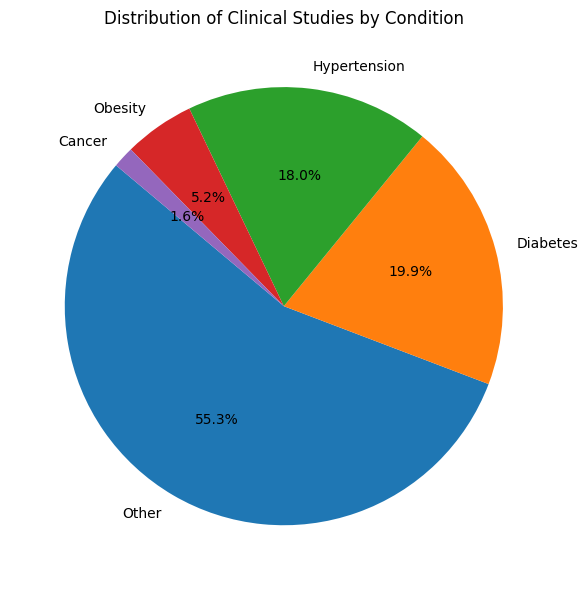

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
mapping_df = pd.read_csv("mapping.csv", encoding="latin1")
data_df = pd.read_csv("code.csv", encoding="latin1")

# Merge the mapping and data tables to get condition descriptions
merged_df = mapping_df.merge(data_df, on="ConditionsID")

# Define target conditions
target_conditions = ["Diabetes", "Cancer", "Obesity", "Hypertension"]

# Filter and group conditions
def categorize_condition(desc):
    for condition in target_conditions:
        if condition.lower() in desc.lower():
            return condition
    return "Other"

merged_df["FilteredCondition"] = merged_df["Desc"].apply(categorize_condition)

# Calculate percentages
condition_counts = merged_df["FilteredCondition"].value_counts(normalize=True) * 100
condition_counts = condition_counts.reset_index()
condition_counts.columns = ["Condition", "Percentage"]

TODO: #filter other to dicover the rest of the conditions

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    condition_counts["Percentage"],
    labels=condition_counts["Condition"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Distribution of Clinical Studies by Condition")
plt.tight_layout()
plt.show()